The organic data set having 10 attributes, 3 rows are merged into single row, We have done the feature processing.

In [100]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,KBinsDiscretizer,OneHotEncoder,StandardScaler
 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.compose import ColumnTransformer
 
from scipy import stats
 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [101]:
df = pd.read_excel('/content/ORGANIC_10ATT.xlsx')  #read data
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


In [102]:
df.isnull().sum()

book    0
λ1      0
λ2      0
λ3      0
n1      0
n2      0
n3      0
k1      0
k2      0
k3      0
dtype: int64

In [103]:
df['λ_binned'] = pd.cut(df['λ1'], [0, 1.5, 4.0,np.inf],labels=['UV','mid_IR','IR'],)
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203,UV


In [104]:
new_df = df.copy()
new_df.drop('λ1',axis=1,inplace=True)
y = new_df['book']
x = new_df.drop('book',axis=1)

In [105]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [106]:
cat_features = ['λ_binned']
numeric_features = ['n1','n2','n3','k1','k2','k3']

In [107]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [108]:
rf_model_bin_one = pipeline.fit(x_train, y_train)
print (rf_model_bin_one)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'n3', 'k1', 'k2',
                                                   'k3']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [109]:
print(f'Training accuracy {rf_model_bin_one.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_one.score(x_test,y_test)}')

Training accuracy 0.9964105074237233
Test accuracy 0.8201262786941412


In [110]:
pred = rf_model_bin_one.predict(x_test)

In [111]:
pred

array(['polycarbonate', 'propanol', 'benzene', ..., 'propanol', 'octane',
       'styrene'], dtype=object)

In [112]:
x_test.head()

,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
59939,0.64600,0.65210,1.586976,1.586502,1.586049,0.000000,0.000000,0.000000,UV
62322,1.87721,1.87738,1.359640,1.359640,1.359640,0.000040,0.000040,0.000040,mid_IR
39194,11.51660,11.52300,1.478530,1.477240,1.475860,0.004700,0.004969,0.005250,IR
24863,2.20285,2.20309,1.397680,1.397680,1.397670,0.000195,0.000196,0.000197,mid_IR
36689,2.22638,2.22662,1.519920,1.519920,1.519920,0.000057,0.000058,0.000058,mid_IR


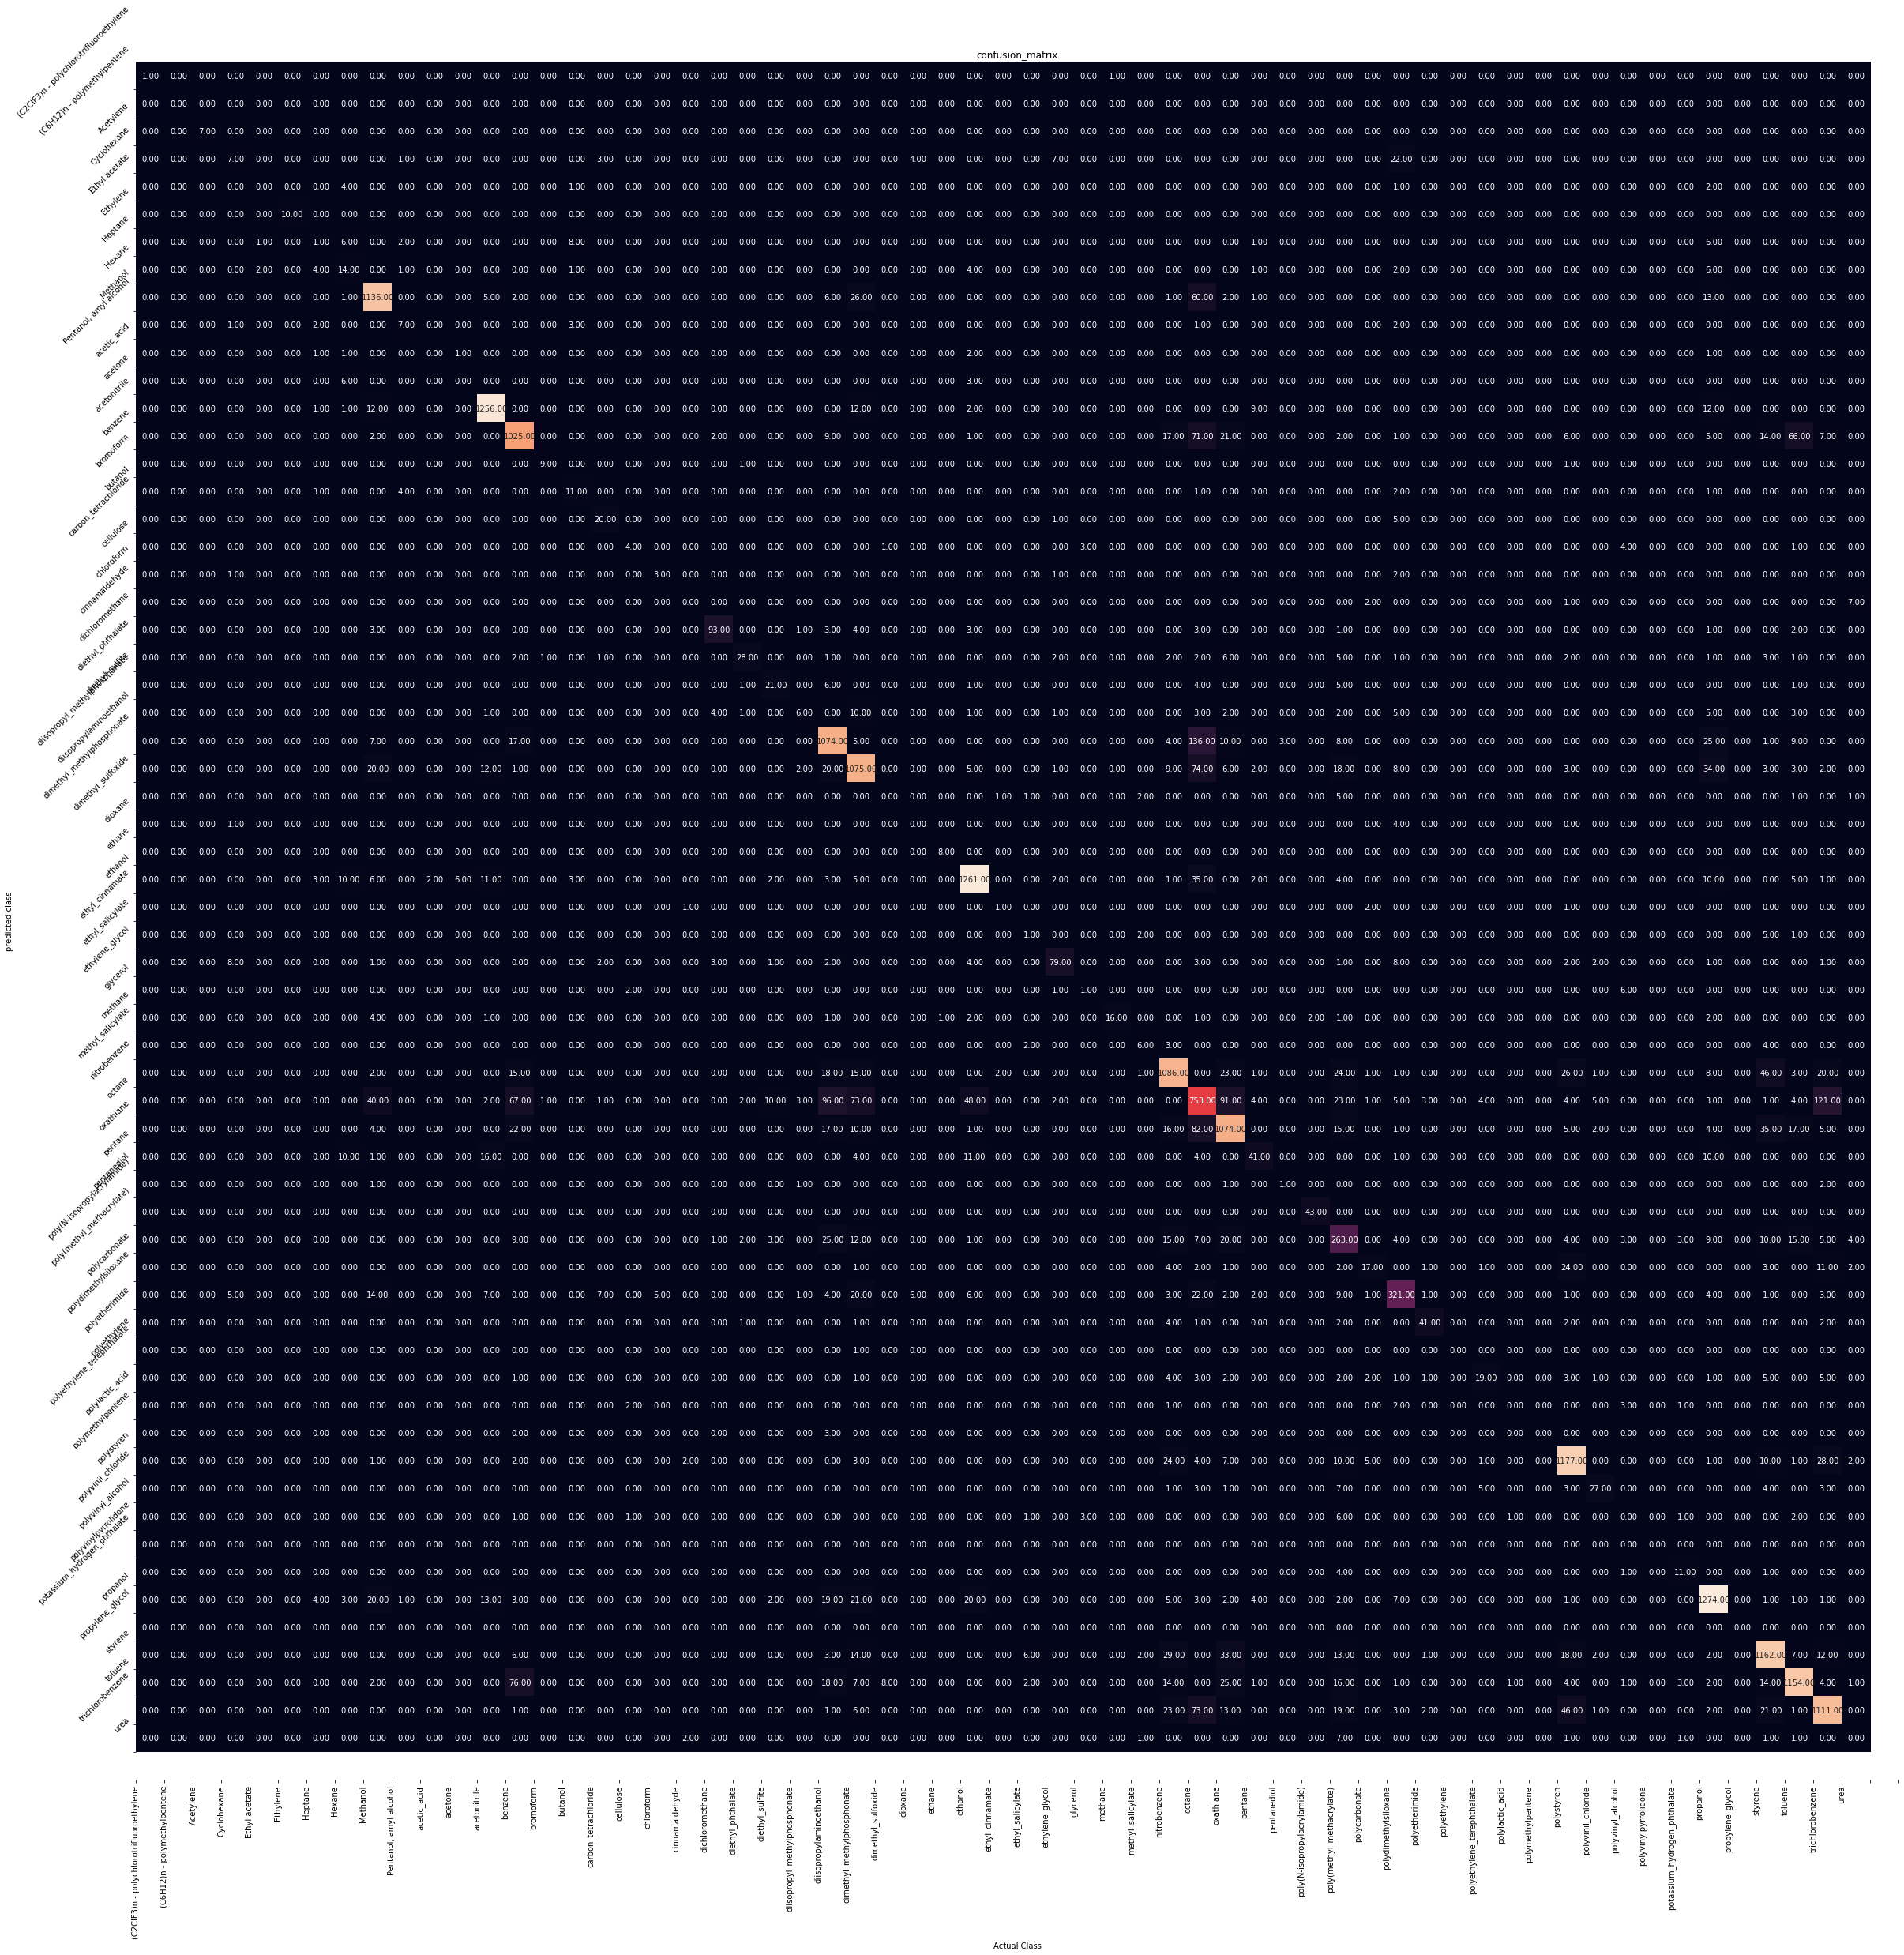

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [114]:
UV = x_test[x_test.λ_binned=='UV']
UV_y = y_test[x_test.λ_binned=='UV']
MID_IR = x_test[x_test.λ_binned=='mid_IR']
MID_IR_y = y_test[x_test.λ_binned=='mid_IR']
IR = x_test[x_test.λ_binned=='IR']
IR_y = y_test[x_test.λ_binned=='IR']

TRAINING ACCURACY FOR 3 BINS

In [116]:
labls = ['UV','mid_IR','IR']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_one.score(train_x,train_y))

In [117]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 0.9999073215940686
mid_IR : 0.9935863332742212
IR : 0.999879995199808


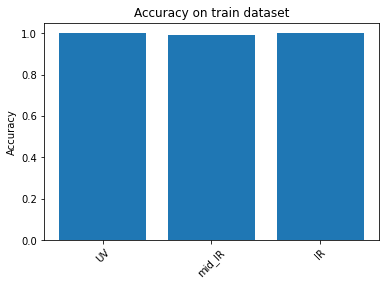

In [118]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [119]:
labls = ['UV','mid_IR','IR']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_one.score(test_x,test_y))


In [120]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.8662774534334168
mid_IR : 0.8680734107633655
IR : 0.6928892889288929


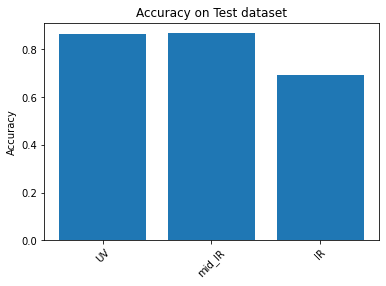

In [121]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [122]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(UV[10:12]))

           λ2     λ3        n1        n2        n3        k1        k2  \
85     0.3260  0.644  1.453379  1.454184  1.413266  0.000000  0.000000   
71887  1.4219  1.422  1.474540  1.474540  1.474540  0.000012  0.000012   

             k3 λ_binned  
85     0.000000       UV  
71887  0.000012       UV  
------------------------------------------------------------------------------------------

Actual Class

 85       Cyclohexane
71887        toluene
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['polydimethylsiloxane' 'toluene']


In [123]:
print(MID_IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',MID_IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(MID_IR[10:12]))

            λ2       λ3       n1       n2       n3        k1        k2  \
24302  1.86879  1.86896  1.39944  1.39943  1.39943  0.000042  0.000042   
36910  2.39697  2.39725  1.51942  1.51942  1.51943  0.000350  0.000348   

             k3 λ_binned  
24302  0.000042   mid_IR  
36910  0.000347   mid_IR  
------------------------------------------------------------------------------------------

Actual Class

 24302    dimethyl_methylphosphonate
36910                  nitrobenzene
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['dimethyl_methylphosphonate' 'nitrobenzene']


In [124]:
print(IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n',IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n',rf_model_bin_one.predict(IR[10:12]))

            λ2       λ3       n1       n2       n3        k1        k2  \
81117  8.49702  8.50050  1.52473  1.52459  1.52447  0.003574  0.003662   
32069  4.39691  4.44211  1.35886  1.35887  1.35887  0.000899  0.000569   

             k3 λ_binned  
81117  0.003741       IR  
32069  0.001007       IR  
------------------------------------------------------------------------------------------

Actual Class
 81117    trichlorobenzene
32069             ethanol
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class
 ['trichlorobenzene' 'ethanol']


In [125]:
df.columns

Index(['book', 'λ1', 'λ2', 'λ3', 'n1', 'n2', 'n3', 'k1', 'k2', 'k3',
       'λ_binned'],
      dtype='object')

In [126]:
sec_df = df.drop('λ_binned',axis=1).copy()
sec_df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


### THE DATASET IS DIVIDED INTO 5 BINS, UV','visible_light','near_IR','IR_rays','Far_IR_Rays

In [127]:
sec_df['λ_binned'] = pd.cut(sec_df['λ1'], [-np.inf,0.4,0.75,1.5,4.0,np.inf],
                            labels=['UV','visible_light','near_IR','IR_rays','Far_IR_Rays'])
sec_df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203,UV


In [128]:
sec_df.drop('λ1',axis=1,inplace=True)
y = sec_df['book']
x = sec_df.drop('book',axis=1)

In [129]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [130]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [132]:
rf_model_bin_two = pipeline.fit(x_train, y_train)
print (rf_model_bin_two)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'n3', 'k1', 'k2',
                                                   'k3']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [133]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9964105074237233
Test accuracy 0.8217904165239097


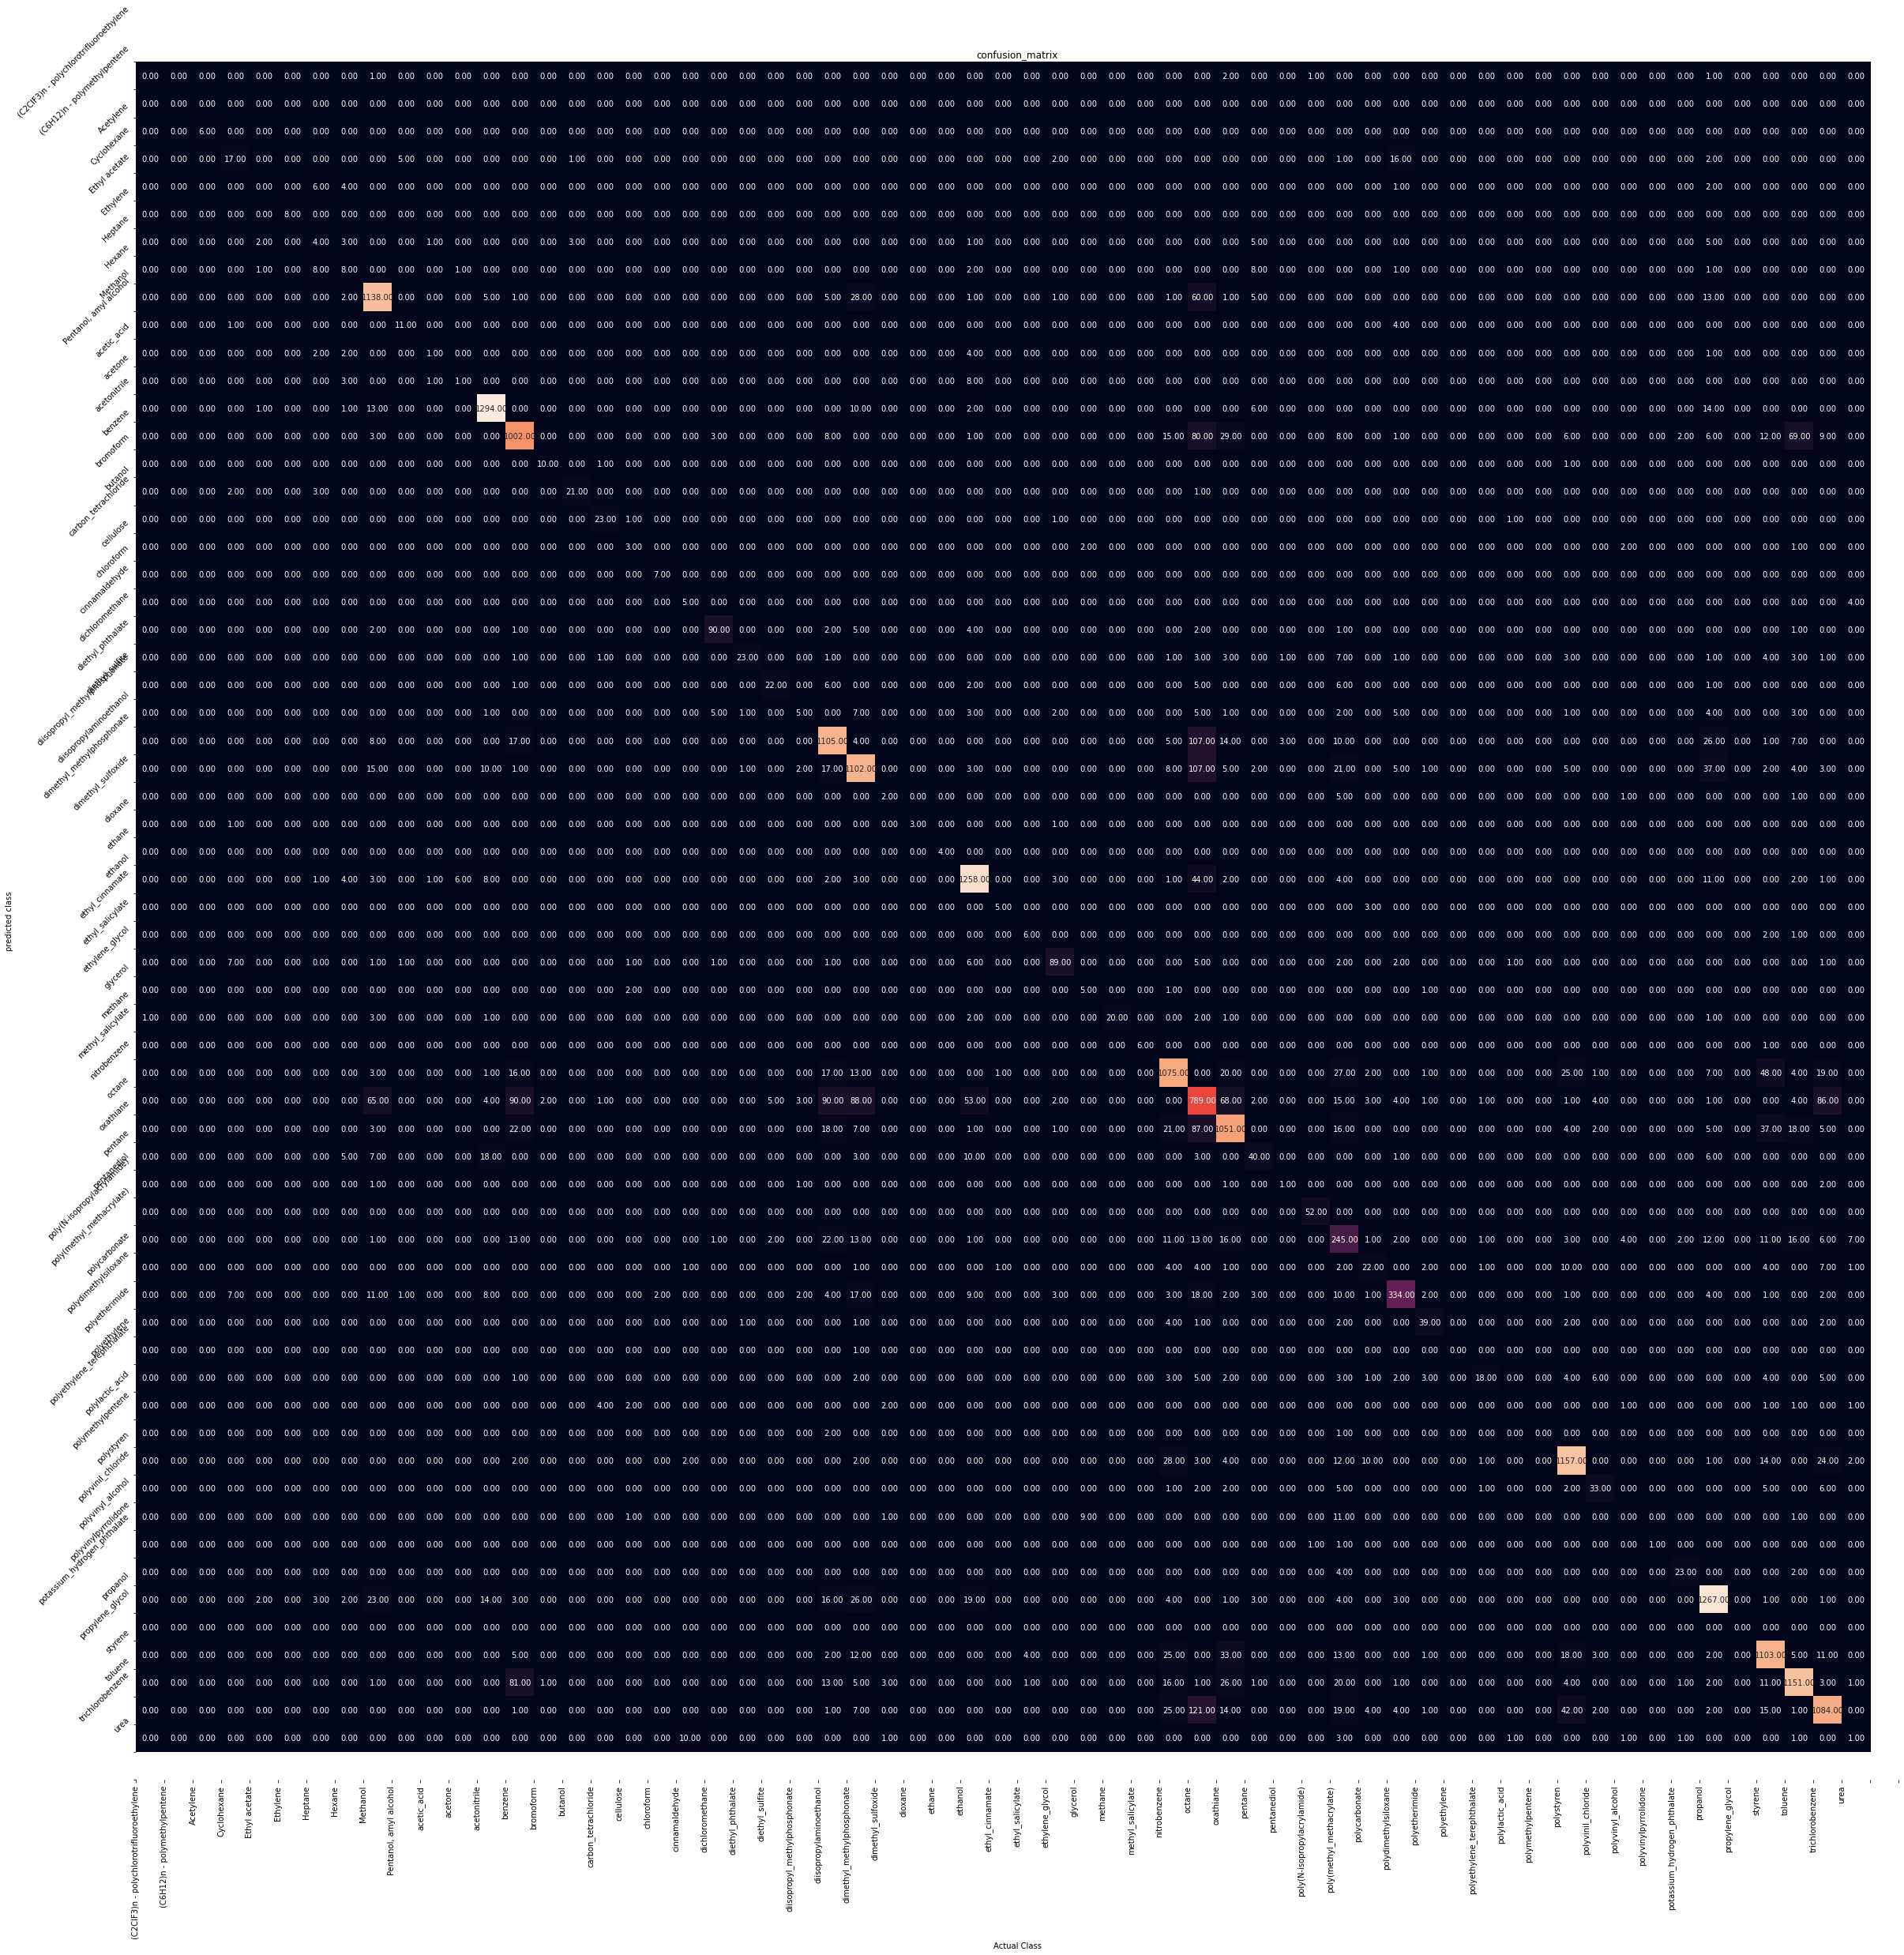

In [134]:
pred = rf_model_bin_two.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [137]:
UV = x_test[x_test.λ_binned== 'UV']
UV_y = y_test[x_test.λ_binned== 'UV']
Visible = x_test[x_test.λ_binned== "Visible"]
Visible_y = y_test[x_test.λ_binned == "Visible"]
Near_IR = x_test[x_test.λ_binned== 'Near_IR']
Near_IR_y = y_test[x_test.λ_binned== 'Near_IR']
IR = x_test[x_test.λ_binned== 'IR']
IR_y = y_test[x_test.λ_binned== 'IR']
Far_IR = x_test[x_test.λ_binned== 'Far_IR']
Far_IR_y = y_test[x_test.λ_binned== 'Far_IR']

TRAINING ACCURACY

In [141]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_two.score(train_x,train_y))

In [142]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 1.0
Far_IR_Rays : 0.999879995199808
IR_rays : 0.9935567772063605
near_IR : 1.0
visible_light : 1.0


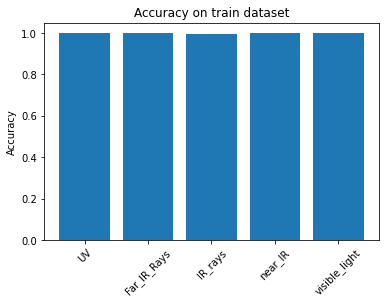

In [143]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TESTING ACCURACY

In [144]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_two.score(test_x,test_y))

In [145]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.5170068027210885
Far_IR_Rays : 0.6921692169216922
IR_rays : 0.8621331678340278
near_IR : 0.9749407382323061
visible_light : 0.5352112676056338


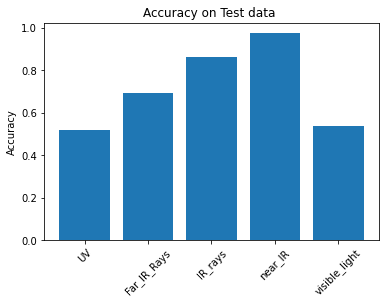

In [146]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test data ')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [147]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_two.predict(UV[10:12]))

         λ2      λ3        n1        n2        n3   k1   k2   k3 λ_binned
232  0.3936  0.3975  1.388499  1.388027  1.387582  0.0  0.0  0.0       UV
118  0.3324  0.3292  1.439146  1.439852  1.440603  0.0  0.0  0.0       UV
------------------------------------------------------------------------------------------

Actual Class

 232    Ethyl acetate
118      Cyclohexane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['Heptane' 'polydimethylsiloxane']


### rounding off

In [150]:
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096,UV
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551,UV
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024,UV
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128,UV
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203,UV


In [151]:
new_df = df.copy()
new_df.drop('λ_binned',axis=1,inplace=True)

In [152]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])


preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [153]:
#split the data for training and testing

acc_tr = []
acc_ts = []

recall = []

round_place = [1,2,3,4,5]

for r in round_place:
  y = new_df['book']
  x = new_df.drop('book',axis=1).round(r)   #rounding off
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
  rf_model = pipeline.fit(x_train,y_train)
  acc_tr.append(rf_model.score(x_train,y_train))
  acc_ts.append(rf_model.score(x_test,y_test))

  pred = rf_model.predict(x_test)

  recall.append(recall_score(y_test,pred,average='weighted'))

In [154]:
acc_tr,acc_ts,recall

([0.26625876978299884,
  0.6707782672540382,
  0.8837330722793277,
  0.9724914341654429,
  0.9933594387338881],
 [0.26171014634623857,
  0.6355538152807009,
  0.7672164847535607,
  0.806911066516568,
  0.8005481865792179],
 [0.26171014634623857,
  0.6355538152807009,
  0.7672164847535607,
  0.806911066516568,
  0.8005481865792179])

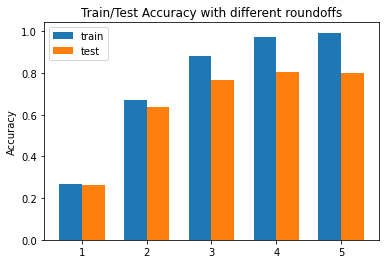

In [155]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.title('Train/Test Accuracy with different roundoffs')
X_axis = np.arange(len(round_place))
ax.bar(X_axis - width/2,acc_tr,width,label='train')
ax.bar(X_axis + width/2,acc_ts,width,label='test')
plt.xticks(X_axis,round_place)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

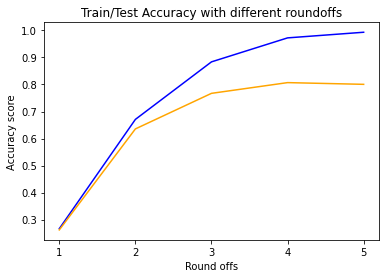

In [156]:
plt.title('Train/Test Accuracy with different roundoffs')
plt.plot(X_axis,acc_tr,color='b',label ='train')
plt.plot(X_axis,acc_ts,color='orange',label='test')
plt.xlabel('Round offs')
plt.ylabel('Accuracy score')
plt.xticks(range(len(round_place)),round_place)
plt.show()

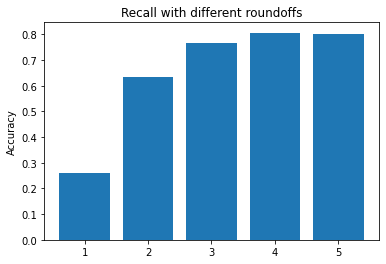

In [157]:
plt.bar(round_place,recall)
plt.title('Recall with different roundoffs')
plt.ylabel('Accuracy')
plt.show()